In [1]:
from pylab import *
from numpy import exp
import numpy as np
import pandas as pd
import bottleneck as bn
import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered") 

### Fermi-Dirac vs Bose Einstein Distributions

Text(0.5, 1.0, 'Bose-Einstein Distribution')

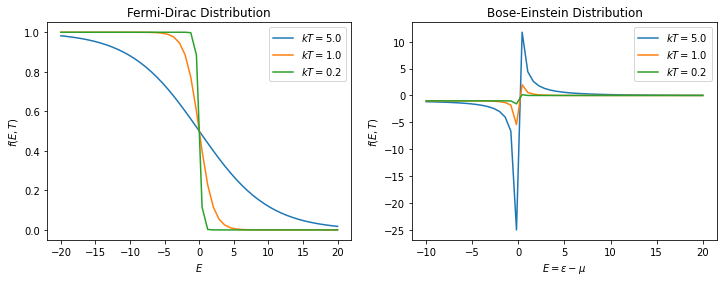

In [2]:
%matplotlib inline

ktvalues = [5.0, 1.0, 0.2];
legarray = [];


fig, ax = plt.subplots(1,2,figsize=(12,4))

for i in range(0,len(ktvalues)):
    kt = ktvalues[i];
    x =linspace(-20,20);
    f = 1.0/(exp(x/kt)+1);
    ax[0].plot(x,f);
    legarray.append("$kT=$"+str(kt));
ax[0].set_xlabel('$E$');
ax[0].set_ylabel('$f(E,T)$')
ax[0].legend(legarray);
ax[0].set_title('Fermi-Dirac Distribution')


for i in range(0,len(ktvalues)):
    kt = ktvalues[i];
    x =linspace(-10,20);
    f = 1.0/(exp(x/kt)-1);
    ax[1].plot(x,f);
    legarray.append("$kT=$"+str(kt));
ax[1].set_xlabel('$E=\epsilon-\mu$');
ax[1].set_ylabel('$f(E,T)$')
ax[1].legend(legarray);
ax[1].set_title('Bose-Einstein Distribution')

kT = 1.0


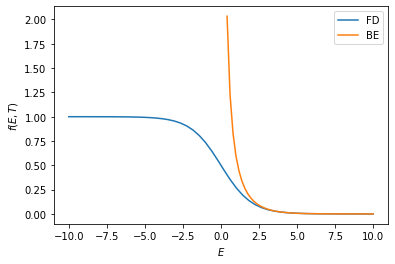

In [3]:
kt = 1.0;
legarray = [];
x =linspace(-10,10);
f = 1.0/(exp(x/kt)+1);
plot(x,f)
legarray.append('FD');
x =linspace(0.4,10);
f = 1.0/(exp(x/kt)-1);
plot(x,f)
legarray.append('BE');
xlabel('$E$');
ylabel('$f(E,T)$')
print('kT = 1.0')
legend(legarray);

### Belief State

Probabilities n_a and n_b
$$ n_b=1/(\exp(E/kT)-1) $$
$$ n_a(t)=n_a*\exp((-2L^2t\pi)/O_b)+n_b*(1-\exp((2L^2t\pi)/O_b)) $$

In [4]:
# import tkinter
# matplotlib.use('TkAgg')
    
def plot_n_a(final):
    plt.rcParams['figure.figsize'] = (8, 8)
    ax = axes(projection='3d')
    ax.plot_trisurf(final.L, final.t, final.n_a, cmap=cm.jet, linewidth=0.2)
    ax.set_ylabel('time t')
    ax.set_xlabel('interaction L')
    ax.set_zlabel('$n_a$')
    plt.show()
    
def plot_n_b(final):
    plt.rcParams['figure.figsize'] = (8, 8)
    ax = axes(projection='3d')
    ax.set_xlabel('Energy E')
    ax.set_ylabel('temp kT')
    ax.set_zlabel('$n_b$')
    ax.plot_trisurf(final.E, final.kT, final.n_b, cmap=cm.jet, linewidth=0.2)
    plt.show()
    

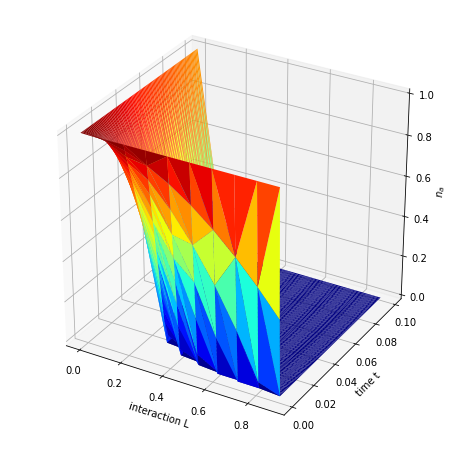

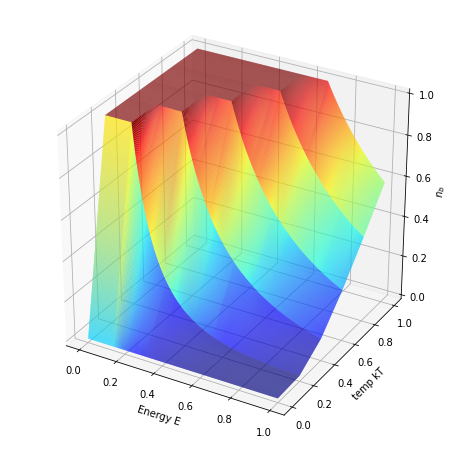

In [5]:
# initial parameters

O_b = 0.01                   # Omega(k) function dependent on particles/degrees of freedom (k) in the reservoir
n_a = 1.0                    # Initial P(A=1), Alice for Brexit
n_b = 1./3                   # Initial homogenous environment for anti-Brexit

# at time t=0,
n_bt = n_b
n_at = n_a

# n_a
# Evolution over time t
final_na = pd.DataFrame(columns=['n_a', 't', 'L'])
for L in np.arange(0, 1, 0.1):
    
    for t in np.arange(0, 0.1, 0.001):

        # update n_at based on bagarello 2018
        n_at = np.clip((n_a * np.exp(((-2*(L**2)*np.pi*t)/O_b)) + n_b * (1-np.exp(-((-2*(L**2)*np.pi*t)/O_b)))), 0, 1)

        # Record the change
        dat = {'n_a':n_at, 't':t, 'L':L}
        final_na = final_na.append(dat, ignore_index=True)

                
# n_b
# Change w.r.t T and E
final_nb = pd.DataFrame(columns=['n_b', 'E', 'kT'])
for kT in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    
    for E in np.arange(0.001, 1.0, 0.001):
        
        # update n_bt based on BE distribution
        n_bt = np.clip((1/(np.exp(E/kT)-1)),0,1)

        # Record the change
        dat = {'n_b':n_bt, 'E':E, 'kT':kT}
        final_nb = final_nb.append(dat, ignore_index=True)
        

plot_n_a(final_na)
plot_n_b(final_nb)

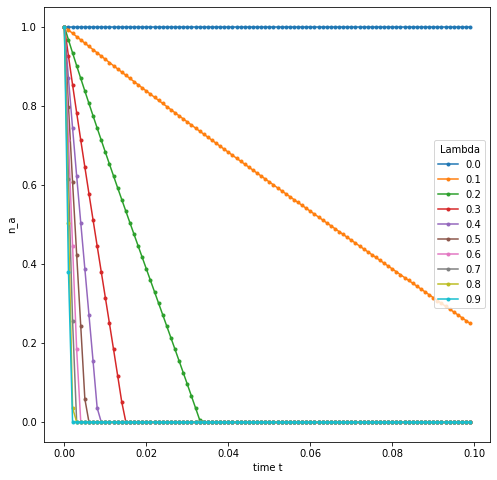

In [6]:
for L in final_na['L'].unique():
  df = final_na.loc[final_na['L'] == L][['t', 'n_a']]
  plt.plot(df['t'].values, df['n_a'].values, label=np.round(L,1), marker=".")
  plt.xlabel('time t')
  plt.ylabel('n_a')
  plt.legend(title='Lambda')

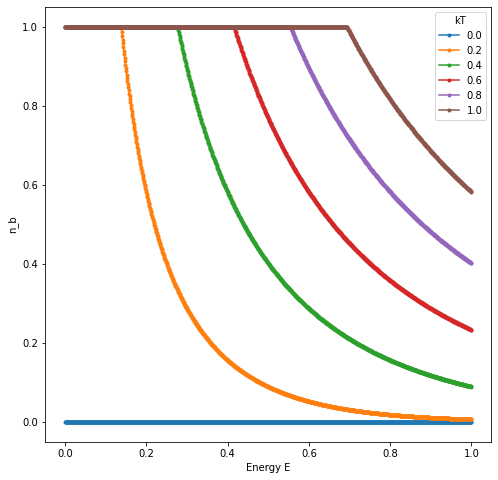

In [7]:
for T in final_nb['kT'].unique():
  df = final_nb.loc[final_nb['kT'] == T]
  plt.plot(df['E'].values, df['n_b'].values, label=T, marker=".")
  plt.xlabel('Energy E')
  plt.ylabel('n_b')
  plt.legend(title='kT')